## Linear Regression  assumptions compliance:
1. Linear relationship = True
2. Multivariate normality: Que las distribuciones sean normales = True.
3. No or little multicolinearity = True or doesnt apply.
4. No auto-correlation = True. (The residuals are independent to eachother, they dont show corr on the scatter plot).
5. Homescedasticity. The residuals are equal accr

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [15,10]
plt.rcParams['font.size'] = 14
plt.rcParams['font.weight'] = 'bold'
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
import statsmodels.api as sm

from sklearn.metrics import mean_squared_error, r2_score

import pickle 
import joblib

## Quick Inspection

In [55]:
df = pd.read_csv('Ecommerce Customers.csv')
df = round(df,2)
df.sample(10)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
55,amberchase@fowler.info,"1867 Gregory Isle Suite 022\nPort Tammy, LA 52...",GreenYellow,33.93,11.59,35.25,3.39,483.67
53,wbrady@yahoo.com,"044 Riggs Expressway\nLake Stevenchester, AL 2...",SandyBrown,33.76,9.98,35.93,3.86,451.46
372,mholt@hotmail.com,"486 Adams Hills\nNorth Walter, MS 18124",LightSeaGreen,31.83,11.27,36.96,2.67,385.15
285,ppowell@gmail.com,"74260 Carly Mews Suite 703\nJonesberg, OR 39594",BlueViolet,32.87,12.09,36.62,3.05,471.60
75,langmatthew@hotmail.com,"606 Perez Drives\nMaryside, CO 94387-5877",DimGray,32.05,12.24,38.73,3.12,478.72
330,dbenson@simpson.net,"732 Heather Place\nNorth Michael, VT 92527",DodgerBlue,30.57,11.35,37.09,4.08,442.06
114,hailey18@yahoo.com,"08079 Thompson Village\nNorth Lukeborough, AL ...",Lime,32.93,12.73,35.60,5.49,642.10
282,denisemorrow@johnson-james.net,"24458 Hudson Square\nHallside, PA 68038",MediumSpringGreen,31.65,13.01,37.79,3.01,475.26
440,hortonrobert@hotmail.com,"31309 Stacey Keys Apt. 979\nSouth Jason, KS 35357",Salmon,33.20,11.97,36.83,3.55,499.14
393,vancemichelle@gmail.com,6586 Reginald Crest Apt. 061\nNorth Josephfort...,DeepPink,32.32,12.42,36.16,3.22,482.83


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


## Cleaning

In [57]:
df.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [58]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [59]:
numeric_cols = ['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent']

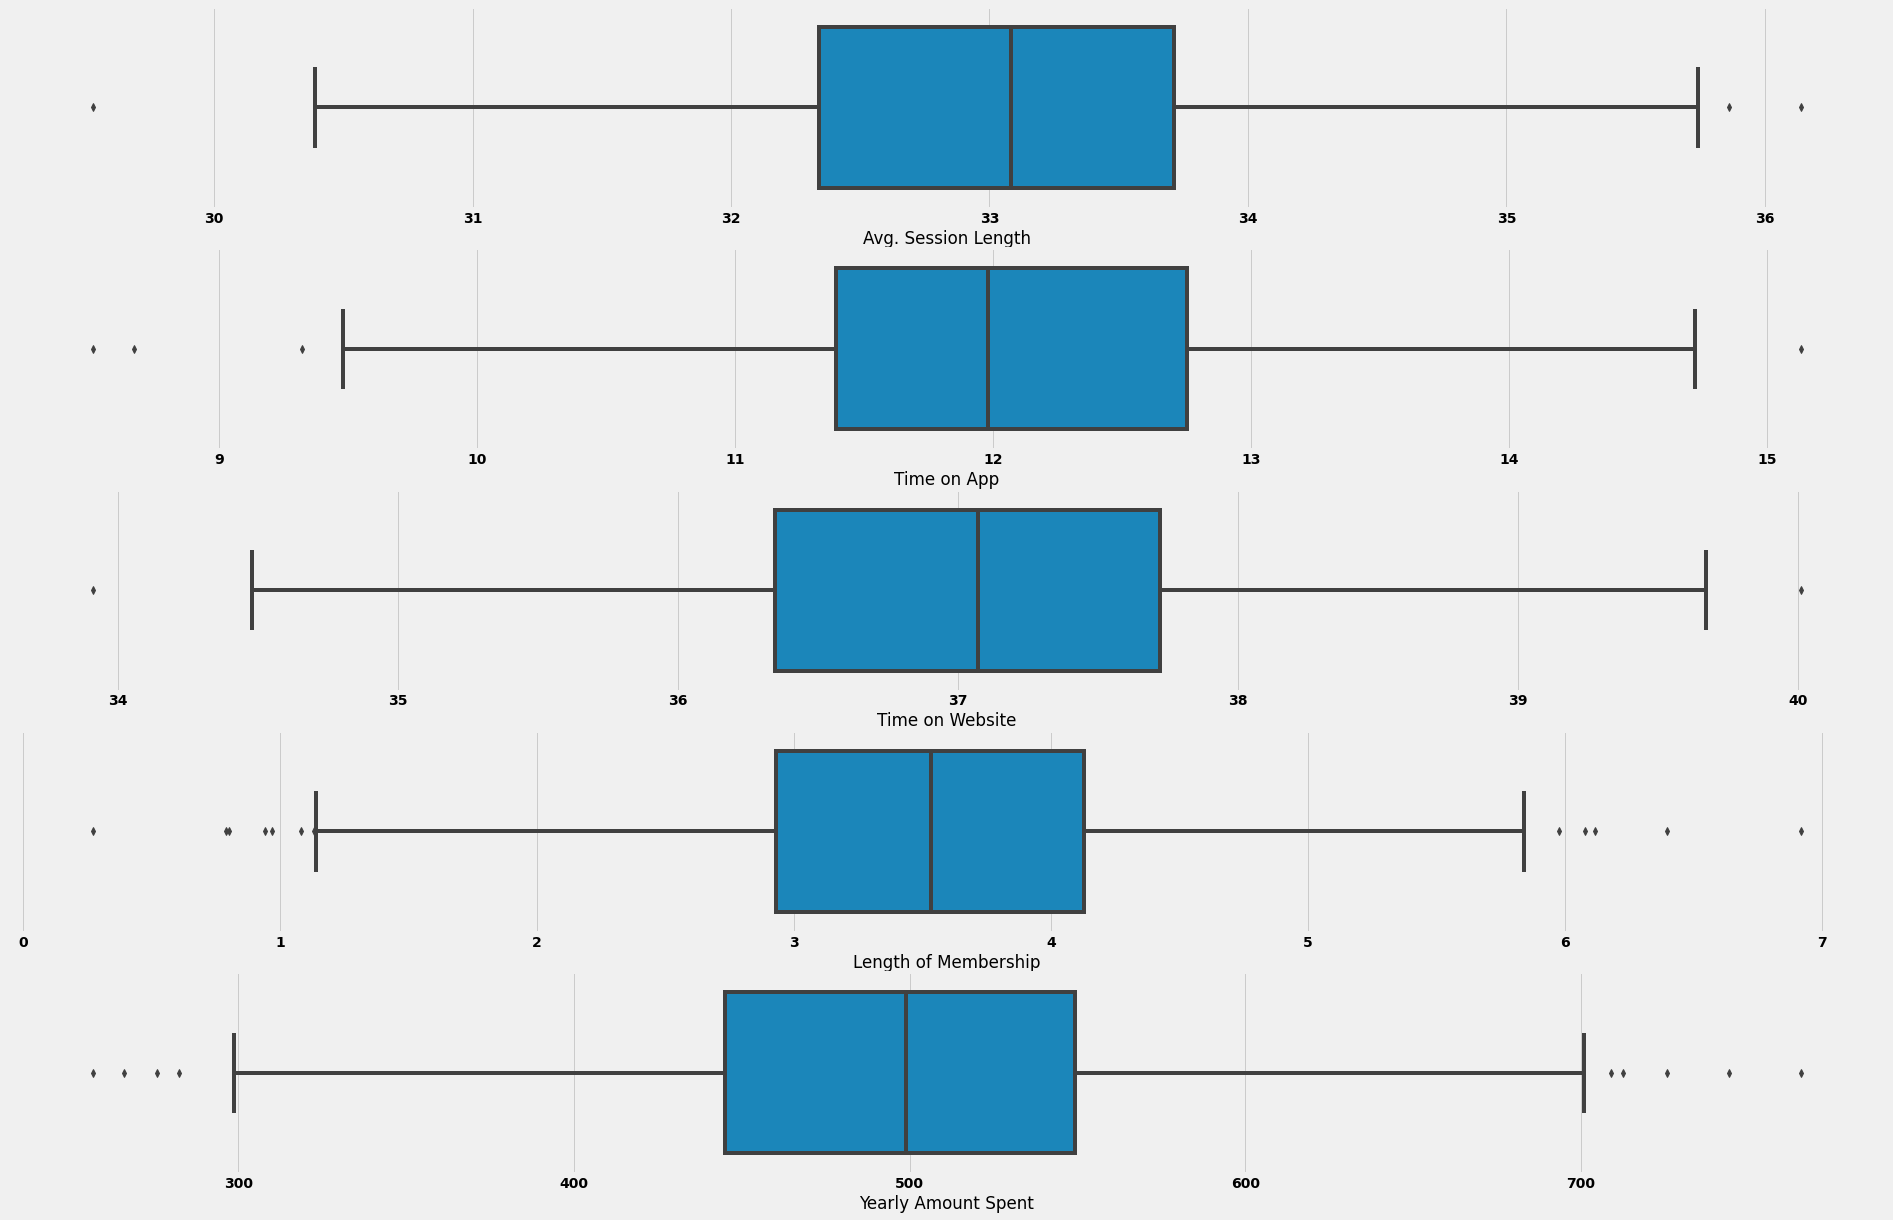

In [60]:
zero = 0
fig, axs = plt.subplots(5, figsize=(30, 20))

for i in numeric_cols:
    plt1 = sns.boxplot(df[i], ax=axs[zero])
    zero = zero+1

In [61]:
#I will make a model with and without outliers
#Lets make a df without outlier
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.00000,500.000000
mean,33.053340,12.052620,37.060480,3.53336,499.314240
std,0.992513,0.994418,1.010555,0.99926,79.314764
min,29.530000,8.510000,33.910000,0.27000,256.670000
25%,32.340000,11.390000,36.347500,2.93000,445.037500
50%,33.085000,11.980000,37.070000,3.53500,498.890000
75%,33.712500,12.752500,37.720000,4.13000,549.312500
max,36.140000,15.130000,40.010000,6.92000,765.520000


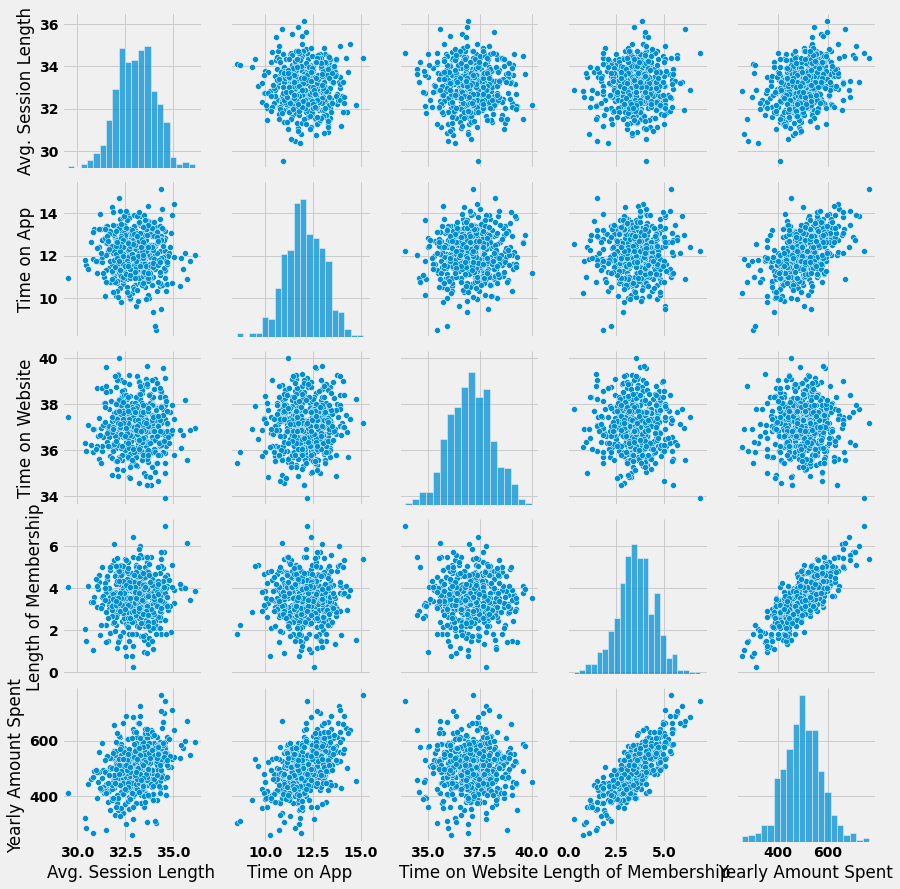

In [62]:
sns.pairplot(df)

<AxesSubplot:>

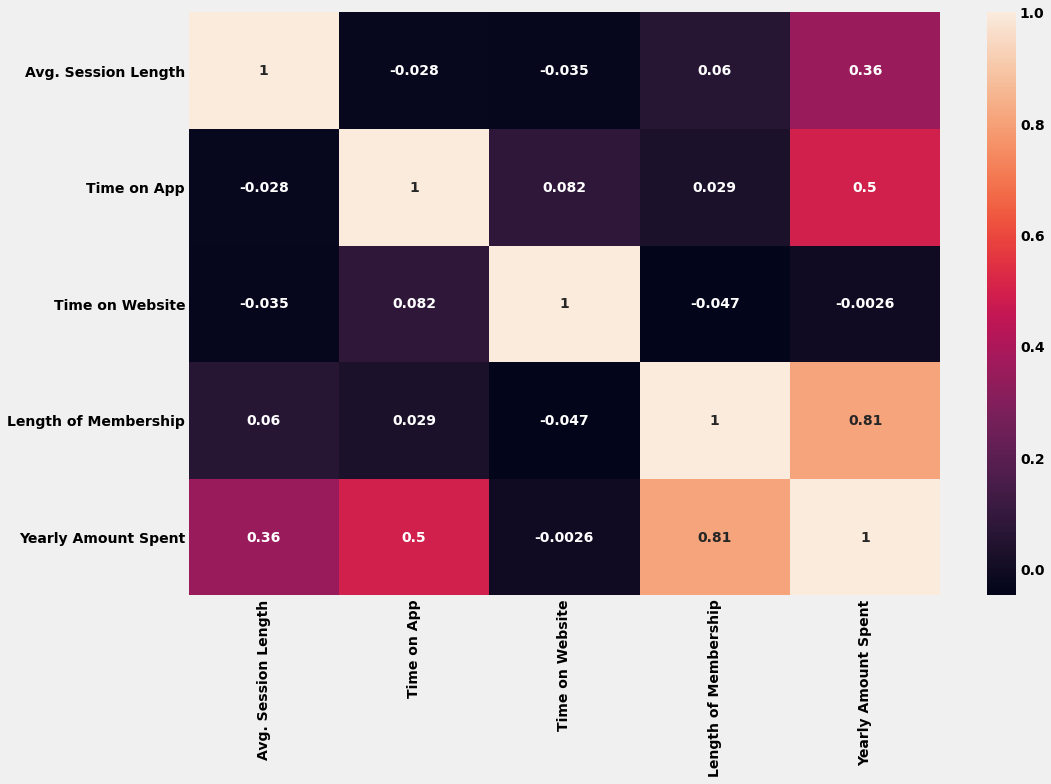

In [63]:
sns.heatmap(df.corr(), annot=True)

In [64]:
X = df['Length of Membership']
y = df['Yearly Amount Spent']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, test_size=0.3, random_state=10)

In [70]:
X_train.tail()

320    1.20
15     3.36
484    2.78
125    4.53
265    4.26
Name: Length of Membership, dtype: float64

In [71]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()

In [72]:
print(lr.summary())

                             OLS Regression Results                            
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.630
Model:                             OLS   Adj. R-squared:                  0.629
Method:                  Least Squares   F-statistic:                     592.8
Date:                 Tue, 15 Jun 2021   Prob (F-statistic):           3.75e-77
Time:                         09:52:57   Log-Likelihood:                -1837.1
No. Observations:                  350   AIC:                             3678.
Df Residuals:                      348   BIC:                             3686.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 

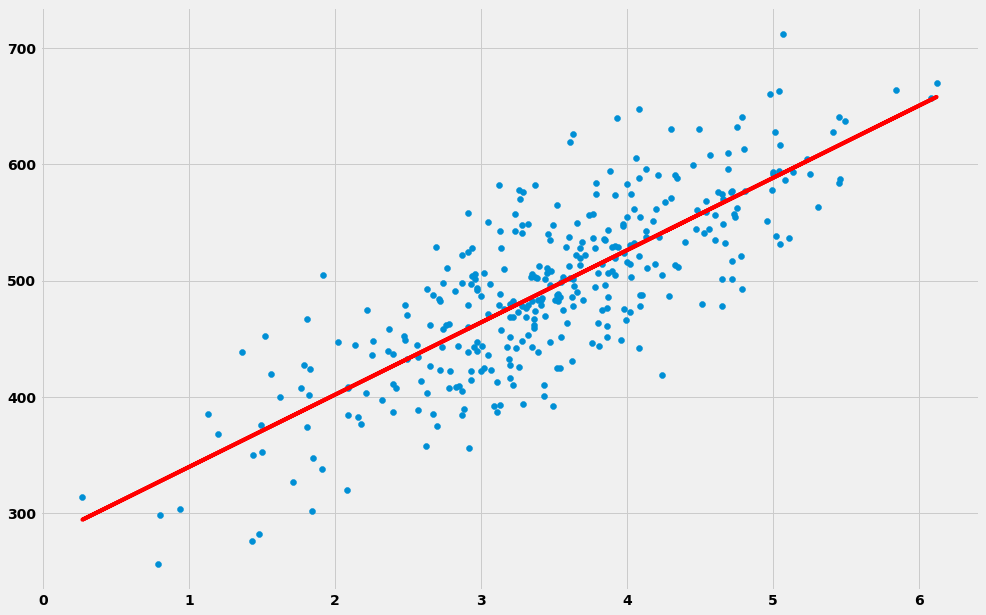

In [73]:
plt.scatter(X_train, y_train)
plt.plot(X_train,277.79 +62.12*X_train, 'r' )
plt.show()

In [74]:
lr.params

const                   277.796983
Length of Membership     62.126148
dtype: float64

## Model evaluation

In [75]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

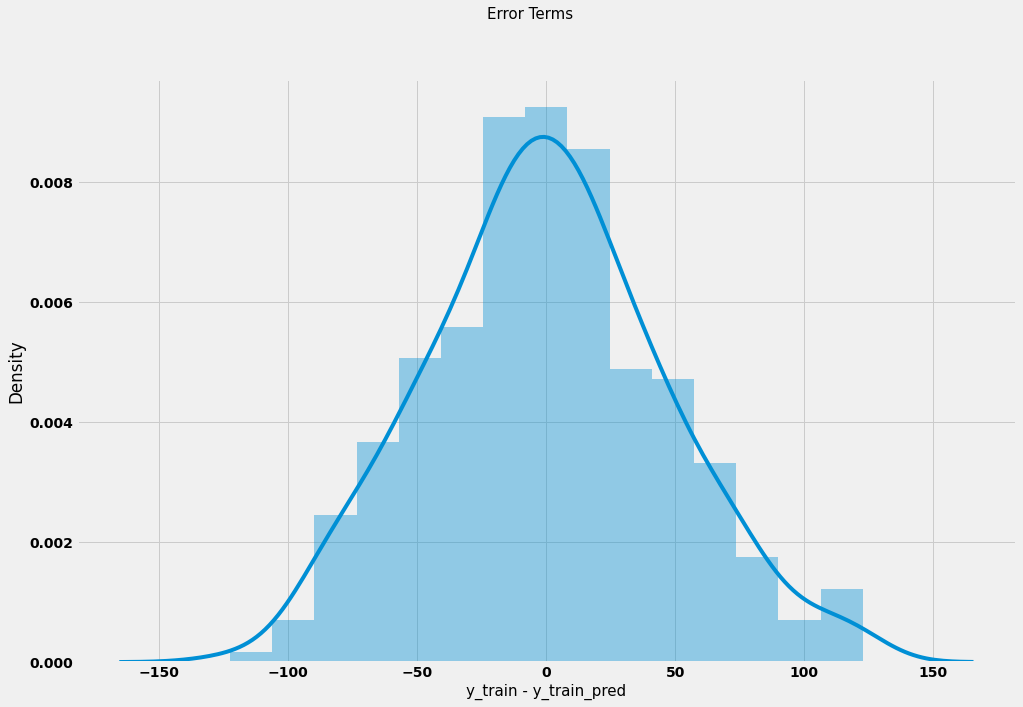

In [76]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

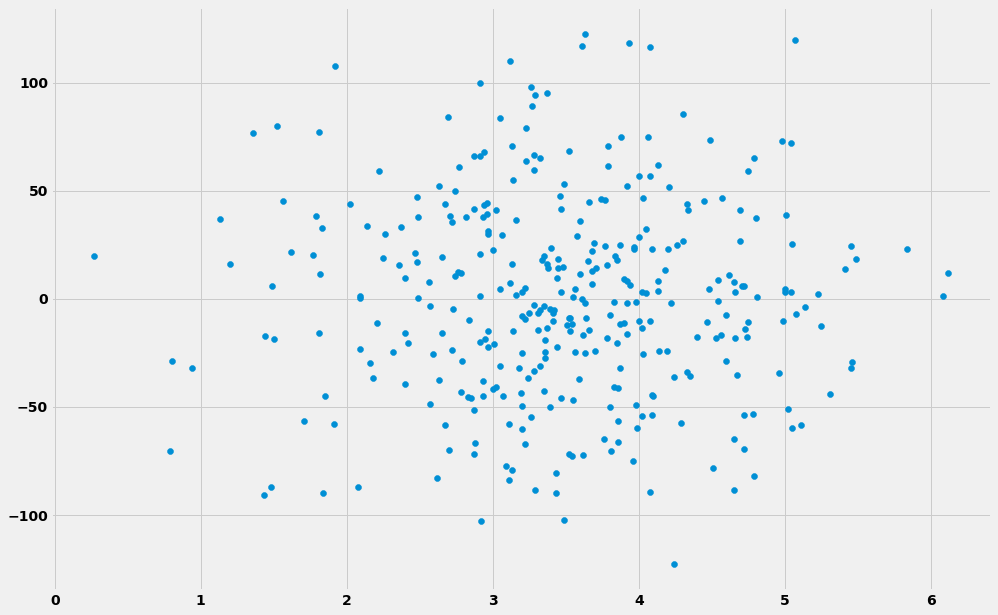

In [77]:
plt.scatter(X_train, res)
plt.show()

## Predictions on the test set

In [78]:
X_test_sm = sm.add_constant(X_test)
y_pred = lr.predict(X_test_sm)
y_pred.head()

151    675.404328
424    467.281733
154    517.603913
190    565.441047
131    583.457629
dtype: float64

In [79]:
lr.params

const                   277.796983
Length of Membership     62.126148
dtype: float64

In [80]:
np.sqrt(mean_squared_error(y_test, y_pred))


47.97249428183935

In [81]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.6845781148401262

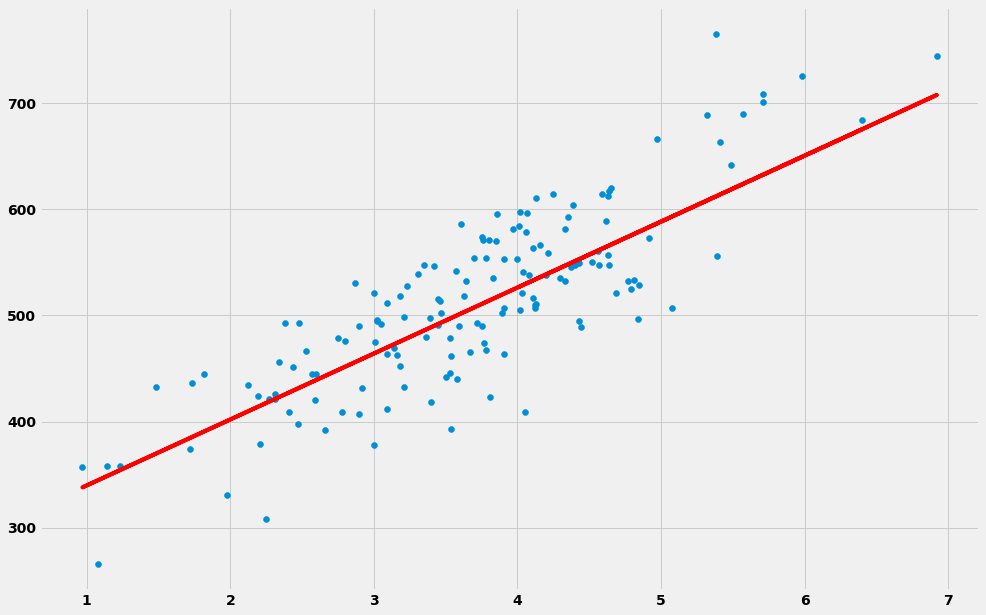

In [82]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 277.79 +62.12*X_test, 'r' )
plt.show()

In [83]:
X_test_sm = sm.add_constant(X_test)
y_pred_sm = asd.predict(X_test_sm)
y_pred_sm.head()

151    675.404328
424    467.281733
154    517.603913
190    565.441047
131    583.457629
dtype: float64

In [84]:
X_train.head()

84     4.40
388    2.78
149    3.99
101    2.88
451    2.40
Name: Length of Membership, dtype: float64

In [85]:
joblib.dump(lr, 'lr_portfolio.sav')
with open('lr_ecommerce.pkl', 'wb') as file:
    pickle.dump(lr,file)

In [86]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [132]:
predc = sm.add_constant(s)
preict = lr.predict(predc)

In [133]:
preict

0    420.687123
1    476.600656
dtype: float64

In [125]:
X_test_sm.tail(10)

,const,Length of Membership
367,1.0,2.90
56,1.0,3.00
37,1.0,3.45
66,1.0,4.00
458,1.0,4.20
12,1.0,4.05
97,1.0,4.25
130,1.0,3.91
472,1.0,3.14
315,1.0,4.01


In [126]:
predc.head(2)

,const,Length of Membership
0,1.0,2.0
1,1.0,3.0


In [114]:
preict

0    339.923131
1    402.049279
2    464.175426
dtype: float64

In [130]:
s = pd.Series([2.3,3.2], dtype=float, name='Length of Membership')

In [118]:
omg = {'length':4}
omg.values()
rly = pd.Series(omg.values())
print(rly)

0    4
dtype: int64


In [120]:
    data = dict()
    length_of_membership = data['length_of_membership']
    predicted_value = pd.Series(data['length_of_membership'], name='Length_of_Membership')

KeyError: 'length_of_membership'